In [97]:
import pandas
import numpy as np
import mpld3
import matplotlib
import matplotlib.pyplot as plt
import datetime

matplotlib.style.use('ggplot')

%matplotlib inline

In [103]:
data = pandas.read_csv('/tmp/inspector_demo.csv',
                       parse_dates=['run_start_timestamp', 'run_check_start_timestamp', 'run_check_end_timestamp'],
                       date_parser=lambda d: datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S"))
print(type(data['run_start_timestamp'][0]))
data.head()

<class 'pandas.tslib.Timestamp'>


,instance_name,database_name,table_name,table_partitioned,run_start_timestamp,run_mode,partition_key,partition_value,check_name,check_policy_type,...,run_check_start_timestamp,run_check_end_timestamp,run_check_mode,run_check_rc,run_check_violation_cnt,run_check_anomaly_score,run_check_scope,run_check_unit,run_check_severity_score,run_check_validated
0,prod,westwind,cust_asset_events,1,2015-01-01 02:00:00,incremental,date_id,2015001,date_id_fk,quality,...,2015-01-01 02:00:00,2015-01-01 02:00:01,incremental,0,0,0,0,rows,0,NaN
1,prod,westwind,cust_asset_events,1,2015-01-01 02:00:00,incremental,date_id,2015001,table_not_empty,quality,...,2015-01-01 02:00:01,2015-01-01 02:00:02,incremental,0,0,0,0,tables,0,NaN
2,prod,westwind,cust_asset_events,1,2015-01-01 02:00:00,incremental,date_id,2015001,asset_id_fk,quality,...,2015-01-01 02:00:02,2015-01-01 02:00:03,incremental,0,0,0,0,rows,0,NaN
3,prod,westwind,cust_asset_events,1,2015-01-01 02:00:00,incremental,date_id,2015001,cust_id_fk,quality,...,2015-01-01 02:00:03,2015-01-01 02:00:04,incremental,0,0,0,0,rows,0,NaN
4,prod,westwind,cust_asset_events,1,2015-01-01 02:00:00,incremental,date_id,2015001,stats_exist,data-management,...,2015-01-01 02:00:04,2015-01-01 02:00:05,full,0,0,0,0,tables,0,NaN


In [100]:
[group['run_check_violation_cnt'].sum() for key, group in data.groupby('instance_name')]

[172669349]

TypeError: list indices must be integers, not str

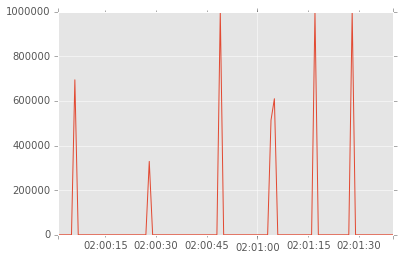

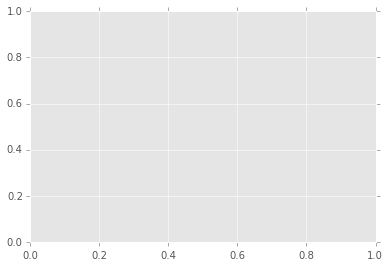

In [101]:
series = [pandas.Series(df['run_check_violation_cnt'].values, index=df['run_check_end_timestamp'].values)
             for df in [group[['run_check_end_timestamp', 'run_check_violation_cnt']]
                         for key, group in data.groupby('instance_name')]]
history = [group[['run_check_end_timestamp', 'run_check_violation_cnt']]
                         for key, group in data.groupby('instance_name')]
[s[:100].plot() for s in series]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(history['run_check_end_timestamp'], history['run_check_violation_cnt'])
plt.show()

In [25]:
[mpld3.fig_to_html(fig) for fig in [group[['run_check_end_timestamp', 'run_check_violation_cnt']].plot() for key, group in data.groupby('instance_name')]]

AttributeError: 'AxesSubplot' object has no attribute 'savefig'